<a href="https://colab.research.google.com/github/saransh121/Kaggle/blob/main/salary_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis and Preprocessing Pipeline

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

#### null values

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

#### data types

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### There are lots of outliers present in the datasets
#### let's visulize and do  analysis

In [ ]:
number_cols = df.select_dtypes(include=['int64']).columns
number_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

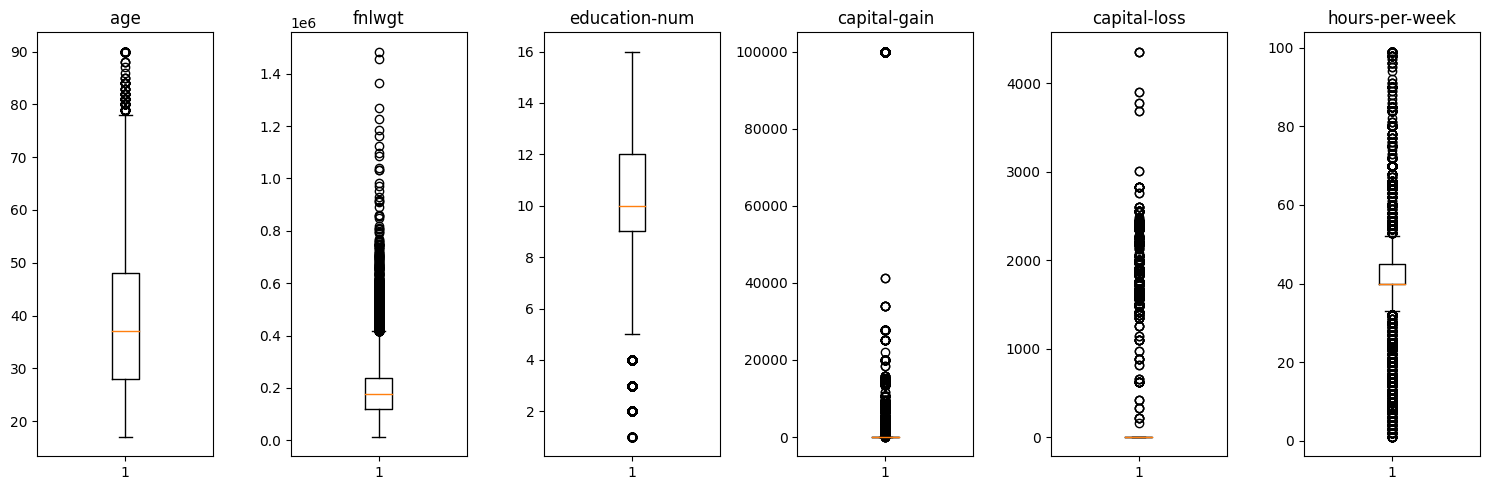

In [ ]:
_,ax = plt.subplots(1,len(number_cols),figsize=(15,5))
for idx ,colname in enumerate(number_cols):
    ax[idx].boxplot(df[colname])
    ax[idx].set_title(colname)
plt.tight_layout()
plt.show()

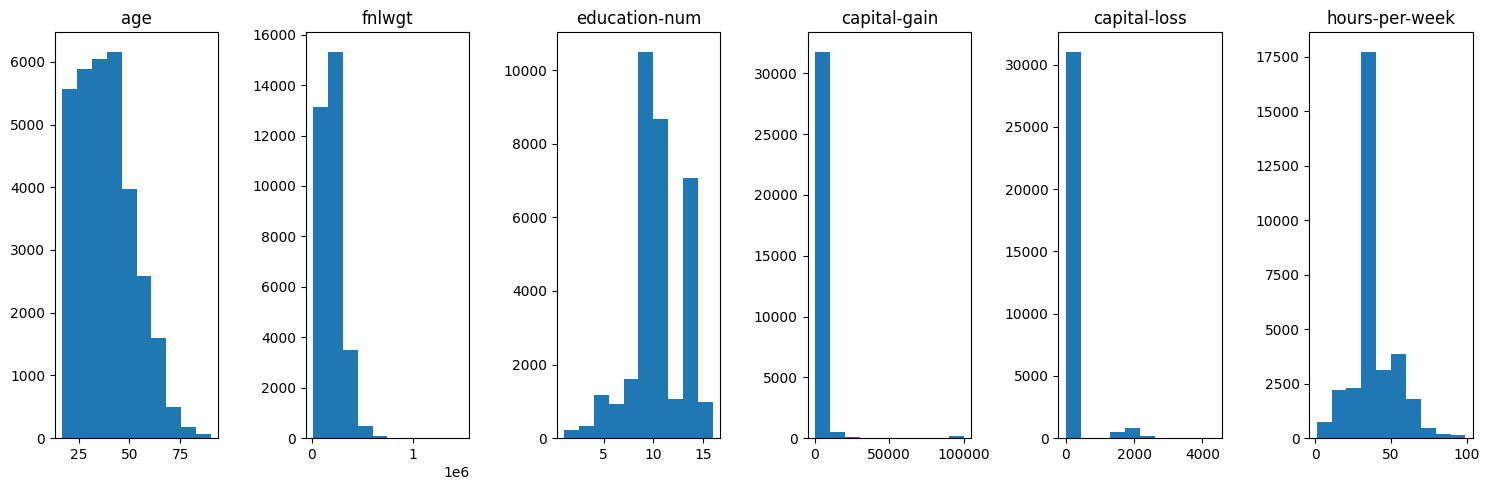

In [ ]:
_,ax = plt.subplots(1,len(number_cols),figsize=(15,5))
for idx ,colname in enumerate(number_cols):
    ax[idx].hist(df[colname])
    ax[idx].set_title(colname)
plt.tight_layout()
plt.show()

### correlarion varifiaction

<AxesSubplot: >

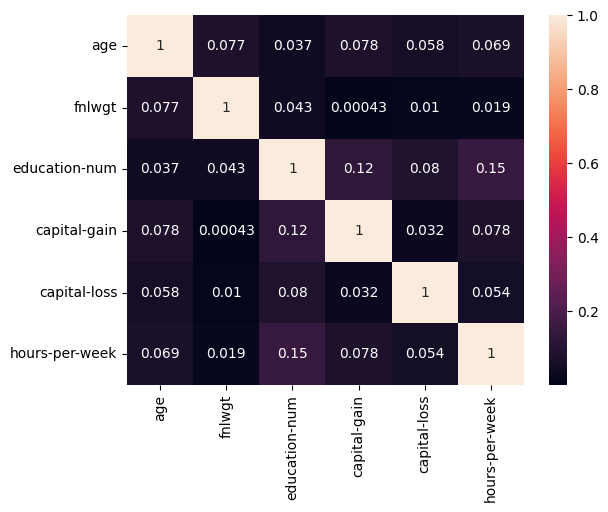

In [ ]:
sns.heatmap(df[number_cols].corr().abs(),annot=True)

In [ ]:
co = df[number_cols].corr().abs()
matrix = co.unstack()
matrix = matrix.sort_values(ascending=False)
threshold = 0.5
high_corr = matrix[(matrix >= threshold) ]

In [ ]:
high_corr_df = pd.DataFrame(high_corr[high_corr.index.get_level_values(0) != high_corr.index.get_level_values(1)])
high_corr_df

,,0


### non of the numerical data are highly correlated to each other

### let's analyize the catagorical varibales

In [ ]:
cat_list = df.select_dtypes(include=['object']).columns
len(cat_list)

9

<Figure size 3000x1500 with 0 Axes>

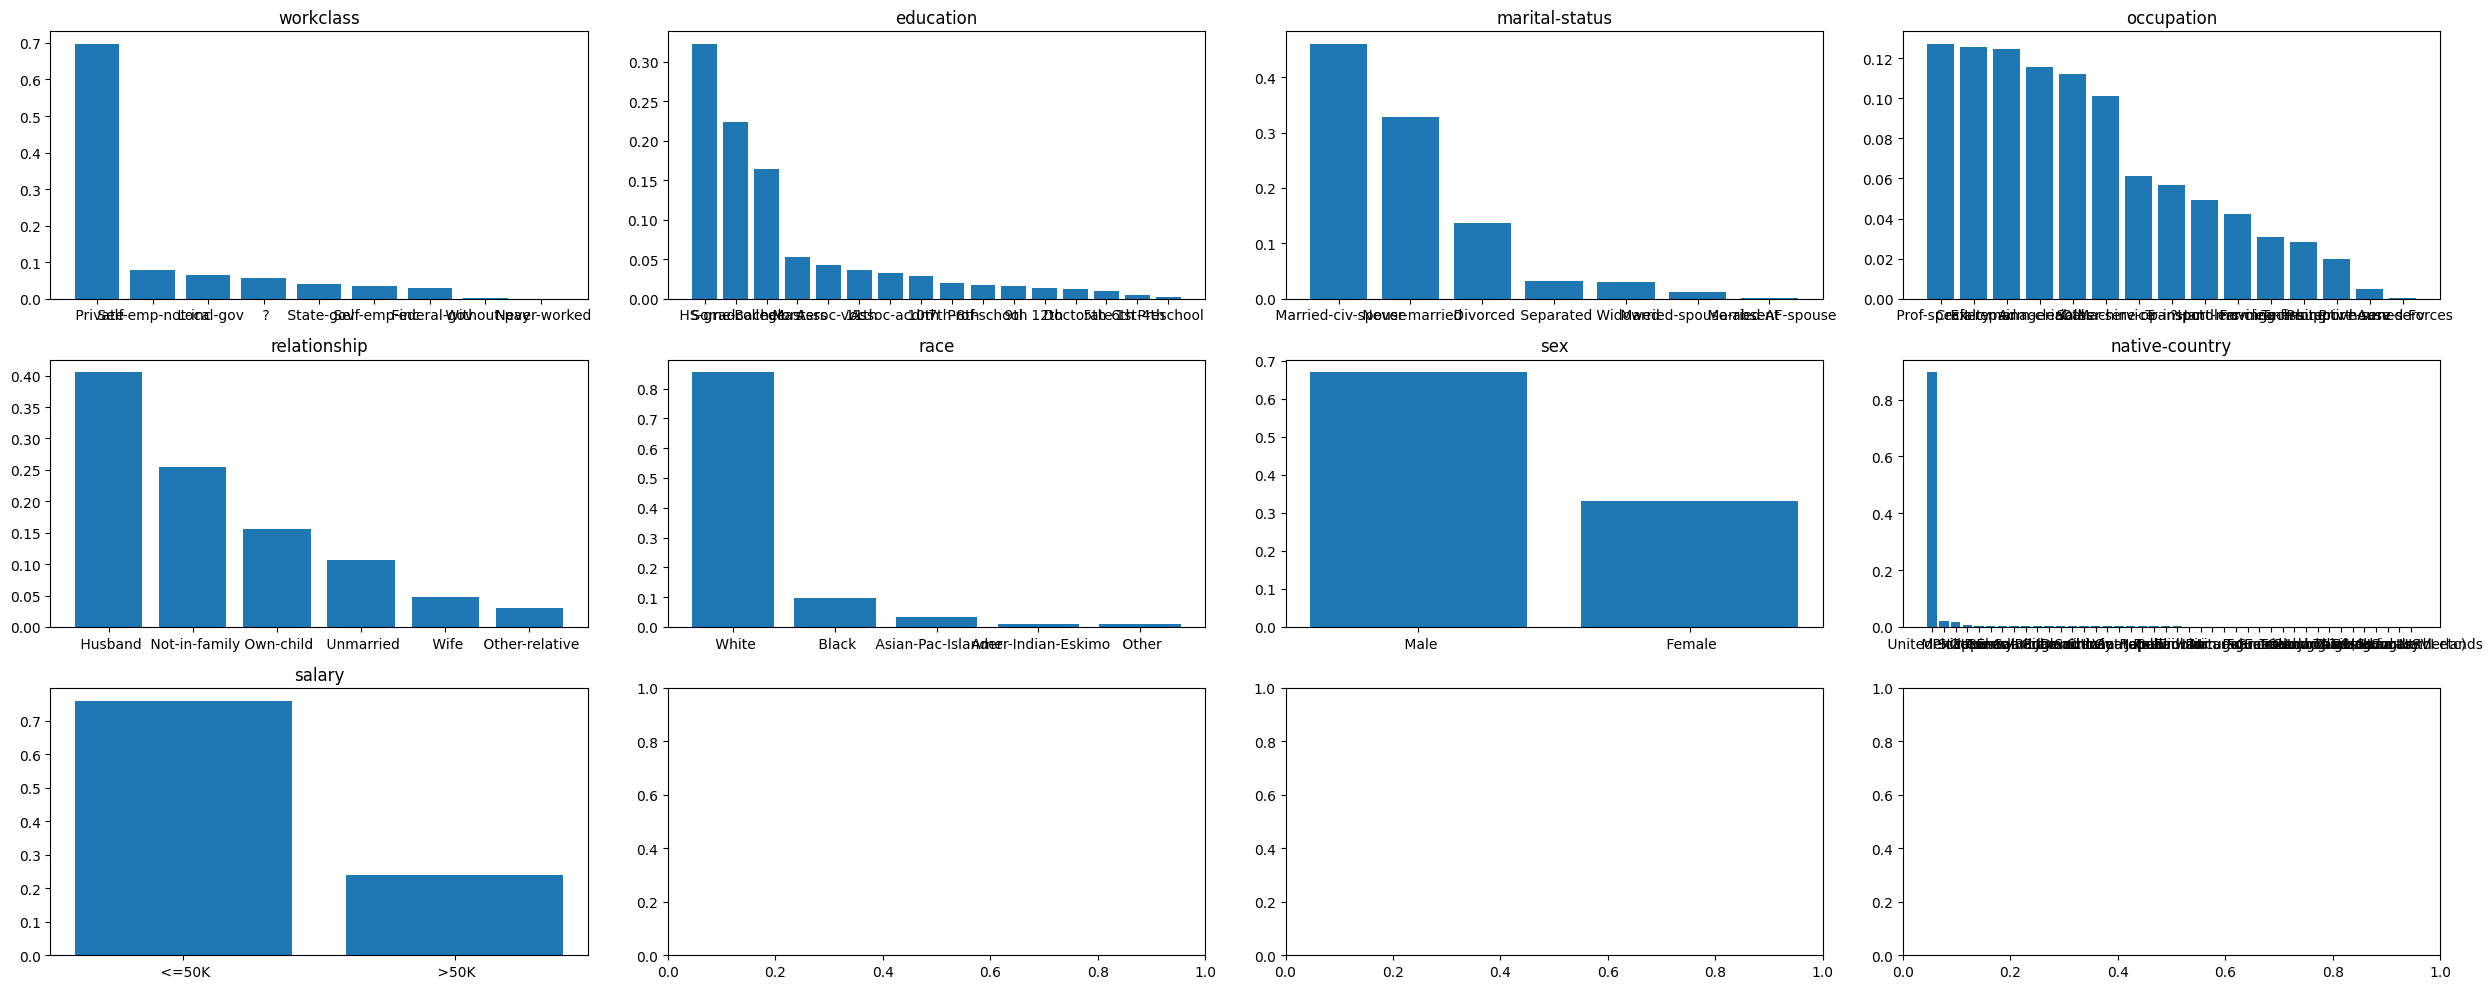

In [ ]:
plt.figure(figsize=(30,15))
_,ax = plt.subplots(3,len(cat_list)//2,figsize=(25,10))
ax = ax.flatten()
for idx , cols in enumerate(cat_list):
    counts = df[cols].value_counts(normalize=True)
    ax[idx].bar(counts.index,counts)
    ax[idx].set_title(cols)
plt.tight_layout()
plt.show()

In [ ]:
def counts(listOfobjectValues):
    plt.figure(figsize=(30,15))
    for cols in listOfobjectValues:
        print(df[cols].value_counts(normalize=True)*100)
        plt.show()
        print("\t")

#### '?' can be treated as null values
#### workclass : ? , can be repalced by mode value
#### occupation : ? can be replaced by Other-service
#### race : Amer-Indian-Eskimo can be treated as other as well
#### native-country is improperly distributted : we can change the rest other reason as others intead of name as the counts is very less

In [ ]:
df['native-country'].value_counts().index

Index([' United-States', ' Mexico', ' ?', ' Philippines', ' Germany',
       ' Canada', ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba',
       ' England', ' Jamaica', ' South', ' China', ' Italy',
       ' Dominican-Republic', ' Vietnam', ' Guatemala', ' Japan', ' Poland',
       ' Columbia', ' Taiwan', ' Haiti', ' Iran', ' Portugal', ' Nicaragua',
       ' Peru', ' France', ' Greece', ' Ecuador', ' Ireland', ' Hong',
       ' Cambodia', ' Trinadad&Tobago', ' Laos', ' Thailand', ' Yugoslavia',
       ' Outlying-US(Guam-USVI-etc)', ' Honduras', ' Hungary', ' Scotland',
       ' Holand-Netherlands'],
      dtype='object')

In [ ]:
df.loc[df.workclass == ' ?','workclass'] = df.workclass.mode()

In [ ]:
df.loc[df.occupation == ' ?','occupation'] = ' Other-service'

In [ ]:
df.loc[df.race==' Amer-Indian-Eskimo','race'] = ' Other'

In [ ]:
df.loc[((df['native-country'] != ' United-States') & (df['native-country'] != ' Mexico')),'native-country'] = 'others'

### run the visulazation again

<Figure size 4000x2500 with 0 Axes>

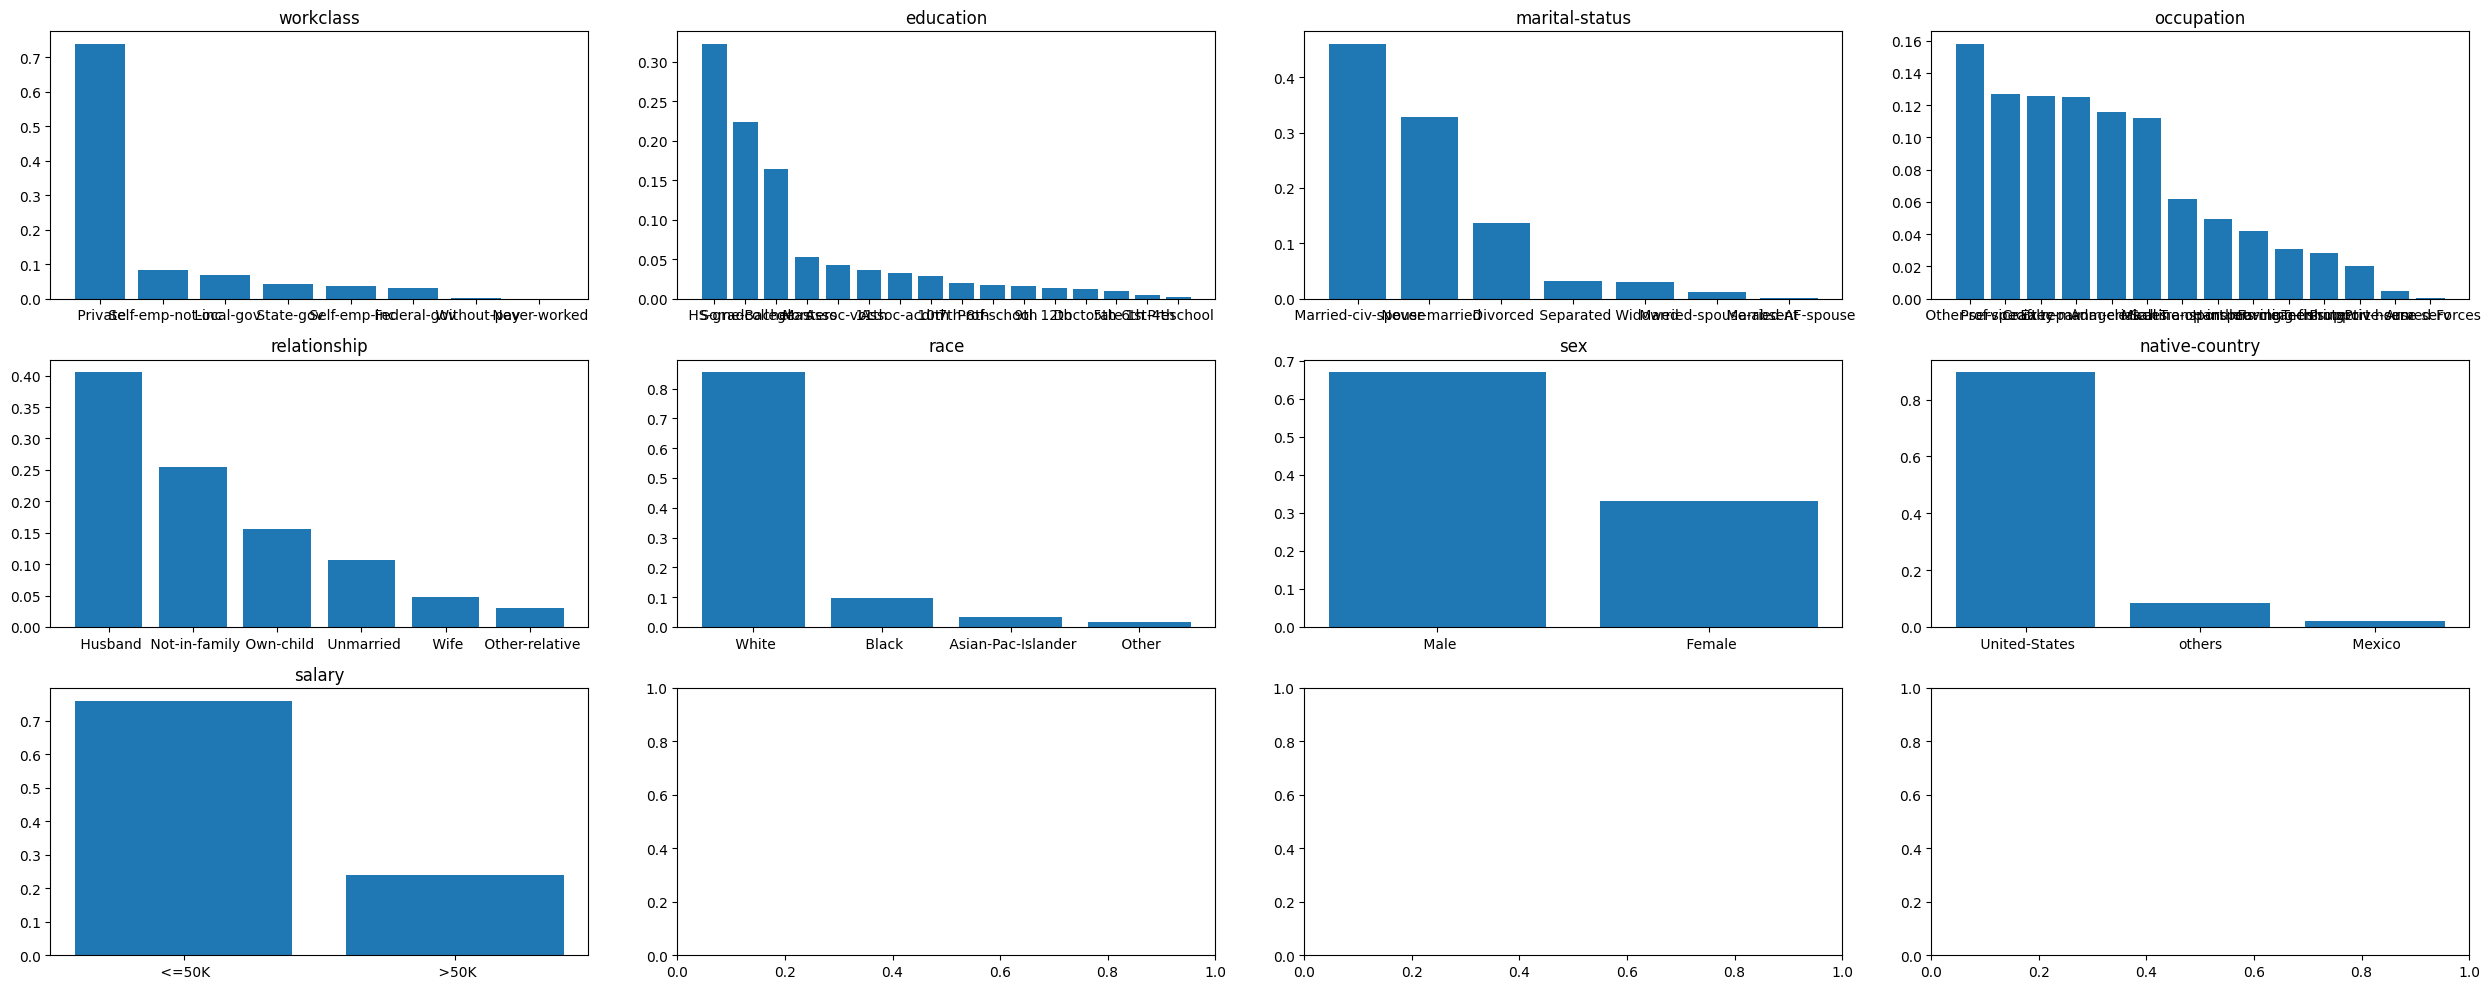

In [ ]:
plt.figure(figsize=(40,25))
_,ax = plt.subplots(3,len(cat_list)//2,figsize=(25,10))
ax = ax.flatten()
for idx , cols in enumerate(cat_list):
    counts = df[cols].value_counts(normalize=True)
    ax[idx].bar(counts.index,counts)
    ax[idx].set_title(cols)
plt.tight_layout()
plt.show()

In [ ]:
cat_list

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

<BarContainer object of 8 artists>

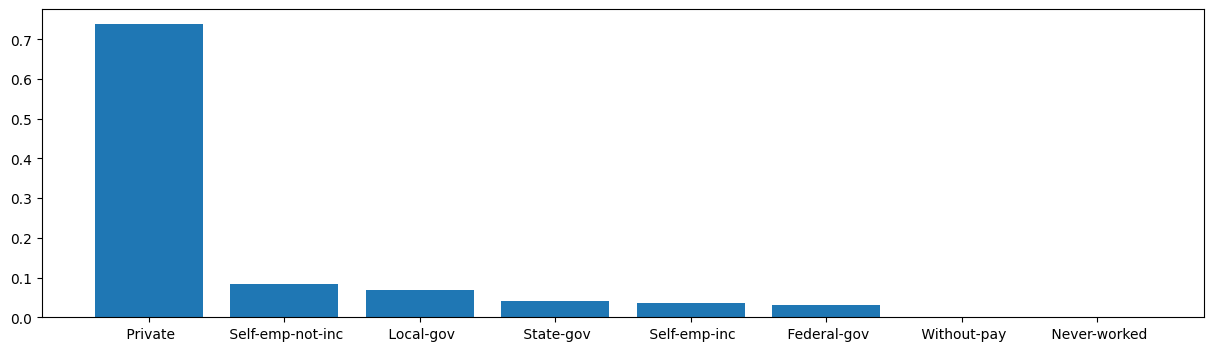

In [ ]:
counts = df['workclass'].value_counts(normalize=True)
plt.figure(figsize=(15,4))
plt.bar(counts.index,counts)

<BarContainer object of 16 artists>

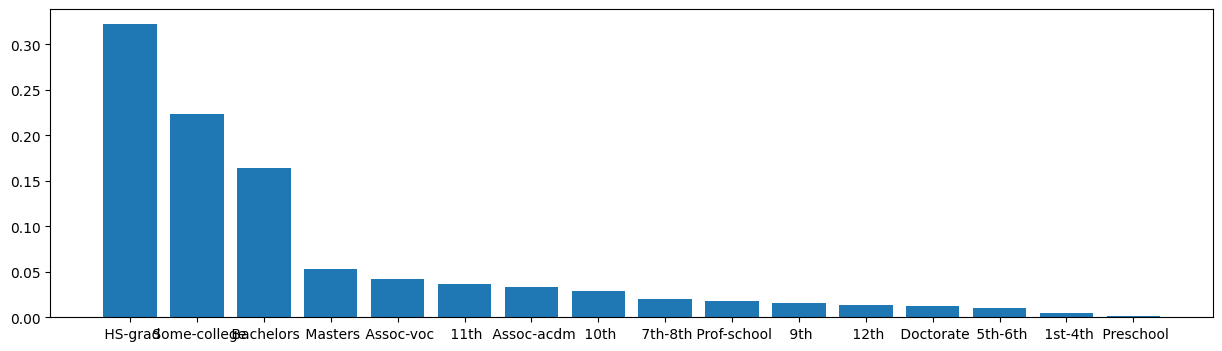

In [ ]:
counts = df['education'].value_counts(normalize=True)
plt.figure(figsize=(15,4))
plt.bar(counts.index,counts)

<BarContainer object of 7 artists>

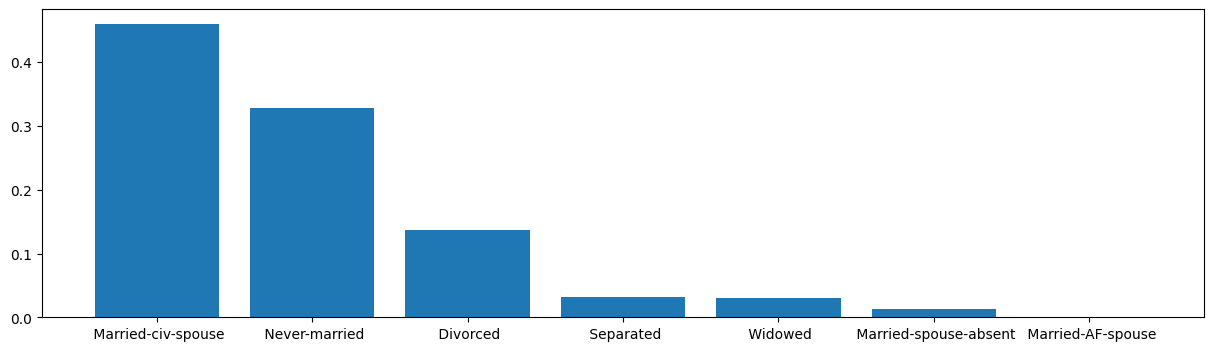

In [ ]:
# marital-status
counts = df['marital-status'].value_counts(normalize=True)
plt.figure(figsize=(15,4))
plt.bar(counts.index,counts)

### we can change all the married related data to married and never-married to unmarried

In [ ]:
df['marital-status'].value_counts(normalize=True).index

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

In [ ]:
df.loc[((df['marital-status'] == ' Married-civ-spouse') | (df['marital-status'] == ' Married-spouse-absent') |
       (df['marital-status'] == ' Married-AF-spouse')),'marital-status']  = 'Married'

<BarContainer object of 5 artists>

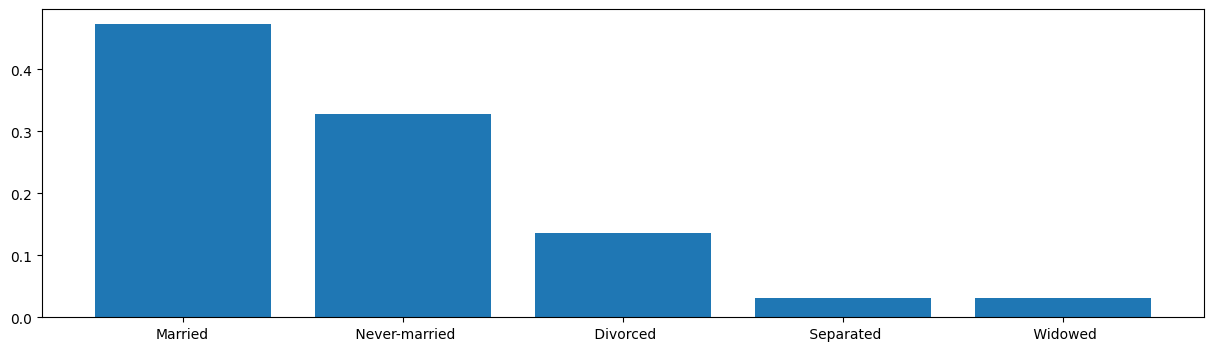

In [ ]:
# marital-status
counts = df['marital-status'].value_counts(normalize=True)
plt.figure(figsize=(15,4))
plt.bar(counts.index,counts)

<BarContainer object of 14 artists>

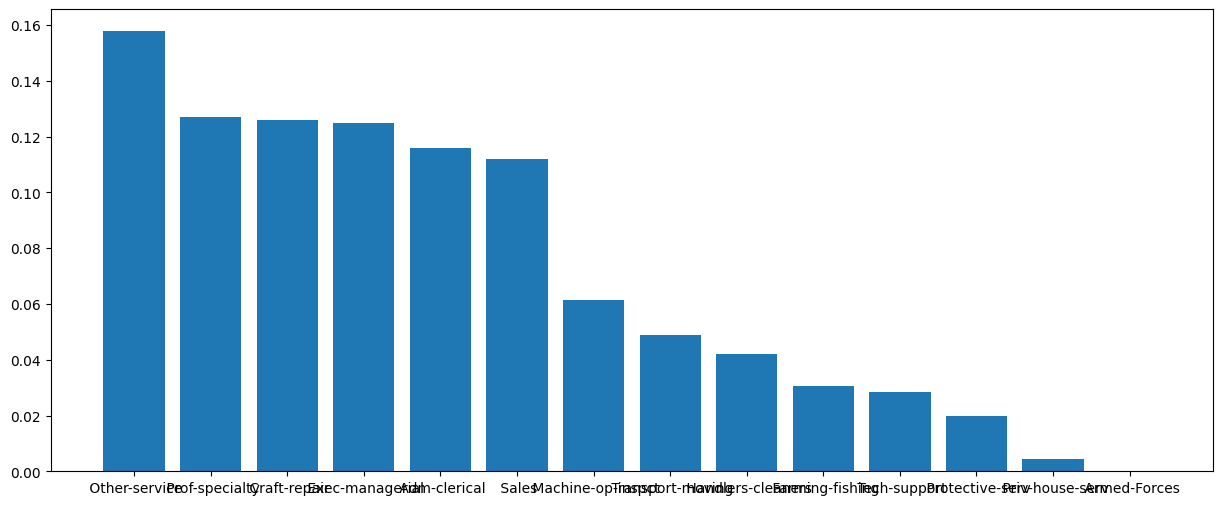

In [ ]:
# occupation
counts = df['occupation'].value_counts(normalize=True)
plt.figure(figsize=(15,6))
plt.bar(counts.index,counts)

### One-Hot Encoding:
Nominal Variables (No Inherent Order):

- 'workclass'
- 'marital-status'
- 'occupation'
- 'relationship'
- 'race'
- 'sex'
- 'native-country'

### Label Encoding:
Binary Variables:
- 'education'
- 'salary'


In [ ]:
df.rename(columns={"marital-status":"marital_status",
                   "education-num":"education_num",
                   "capital-gain":"capital_gain",
                   "capital-loss":"capital_loss",
                   "hours-per-week":"hours_per_week",
                   "native-country":"native_country"},inplace=True)

In [ ]:
def one_hot_encoder(listofCols,dataFrame):
  for cols in listofCols:
    print(cols)
#     print(dataFrame[cols])
    one_hot = pd.get_dummies(dataFrame[cols])
    dataFrame = dataFrame.drop(cols, axis=1)
    dataFrame = pd.concat([one_hot,dataFrame],axis=1)
  return dataFrame

In [ ]:
one_hot_encodedValues = ['workclass','marital_status','occupation','relationship','race','sex','native_country']

In [ ]:
df = one_hot_encoder(one_hot_encodedValues,df)
print(df.shape)

workclass
marital_status
occupation
relationship
race
sex
native_country
(32561, 50)


In [ ]:
df.head()

,Mexico,United-States,others,Female,Male,Asian-Pac-Islander,Black,Other,White,Husband,...,State-gov,Without-pay,age,fnlwgt,education,education_num,capital_gain,capital_loss,hours_per_week,salary
0,0,1,0,0,1,0,0,0,1,0,...,1,0,39,77516,Bachelors,13,2174,0,40,<=50K
1,0,1,0,0,1,0,0,0,1,1,...,0,0,50,83311,Bachelors,13,0,0,13,<=50K
2,0,1,0,0,1,0,0,0,1,0,...,0,0,38,215646,HS-grad,9,0,0,40,<=50K
3,0,1,0,0,1,0,1,0,0,1,...,0,0,53,234721,11th,7,0,0,40,<=50K
4,0,0,1,1,0,0,1,0,0,0,...,0,0,28,338409,Bachelors,13,0,0,40,<=50K


In [ ]:
df.salary.value_counts().index

df.salary = df.salary.map({" <=50K":0," >50K":1})

In [ ]:
df.education.value_counts().index

Index([' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc',
       ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th',
       ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'],
      dtype='object')

In [ ]:
education_order = {
    ' Preschool': 1,
    ' 1st-4th': 2,
    ' 5th-6th': 3,
    ' 7th-8th': 4,
    ' 9th': 5,
    ' 10th': 6,
    ' 11th': 7,
    ' 12th': 8,
    ' HS-grad': 9,
    ' Some-college': 10,
    ' Assoc-acdm': 11,
    ' Assoc-voc': 12,
    ' Bachelors': 13,
    ' Masters': 14,
    ' Doctorate': 15,
    ' Prof-school': 16
}
df.education = df.education.map(education_order)

In [ ]:
df.columns

Index([' Mexico', ' United-States', 'others', ' Female', ' Male',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Husband',
       ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried',
       ' Wife', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', ' Divorced', ' Never-married', ' Separated',
       ' Widowed', 'Married', ' Federal-gov', ' Local-gov', ' Never-worked',
       ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov',
       ' Without-pay', 'age', 'fnlwgt', 'education', 'education_num',
       'capital_gain', 'capital_loss', 'hours_per_week', 'salary'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '').str.replace('-', '_')
print(df.columns)

Index(['Mexico', 'United_States', 'others', 'Female', 'Male',
       'Asian_Pac_Islander', 'Black', 'Other', 'White', 'Husband',
       'Not_in_family', 'Other_relative', 'Own_child', 'Unmarried', 'Wife',
       'Adm_clerical', 'Armed_Forces', 'Craft_repair', 'Exec_managerial',
       'Farming_fishing', 'Handlers_cleaners', 'Machine_op_inspct',
       'Other_service', 'Priv_house_serv', 'Prof_specialty', 'Protective_serv',
       'Sales', 'Tech_support', 'Transport_moving', 'Divorced',
       'Never_married', 'Separated', 'Widowed', 'Married', 'Federal_gov',
       'Local_gov', 'Never_worked', 'Private', 'Self_emp_inc',
       'Self_emp_not_inc', 'State_gov', 'Without_pay', 'age', 'fnlwgt',
       'education', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'salary'],
      dtype='object')


In [ ]:
df.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [ ]:
df.education.value_counts()

9     10501
10     7291
13     5355
14     1723
12     1382
7      1175
11     1067
6       933
4       646
16      576
5       514
8       433
15      413
3       333
2       168
1        51
Name: education, dtype: int64

#### seems education and education_num have same significance,so  we can drop education_num

In [ ]:
df.drop(columns=['education_num'],inplace=True)

In [ ]:
number_cols = ['age','fnlwgt','capital_gain','capital_loss','hours_per_week']

#### enggniering on numeric values

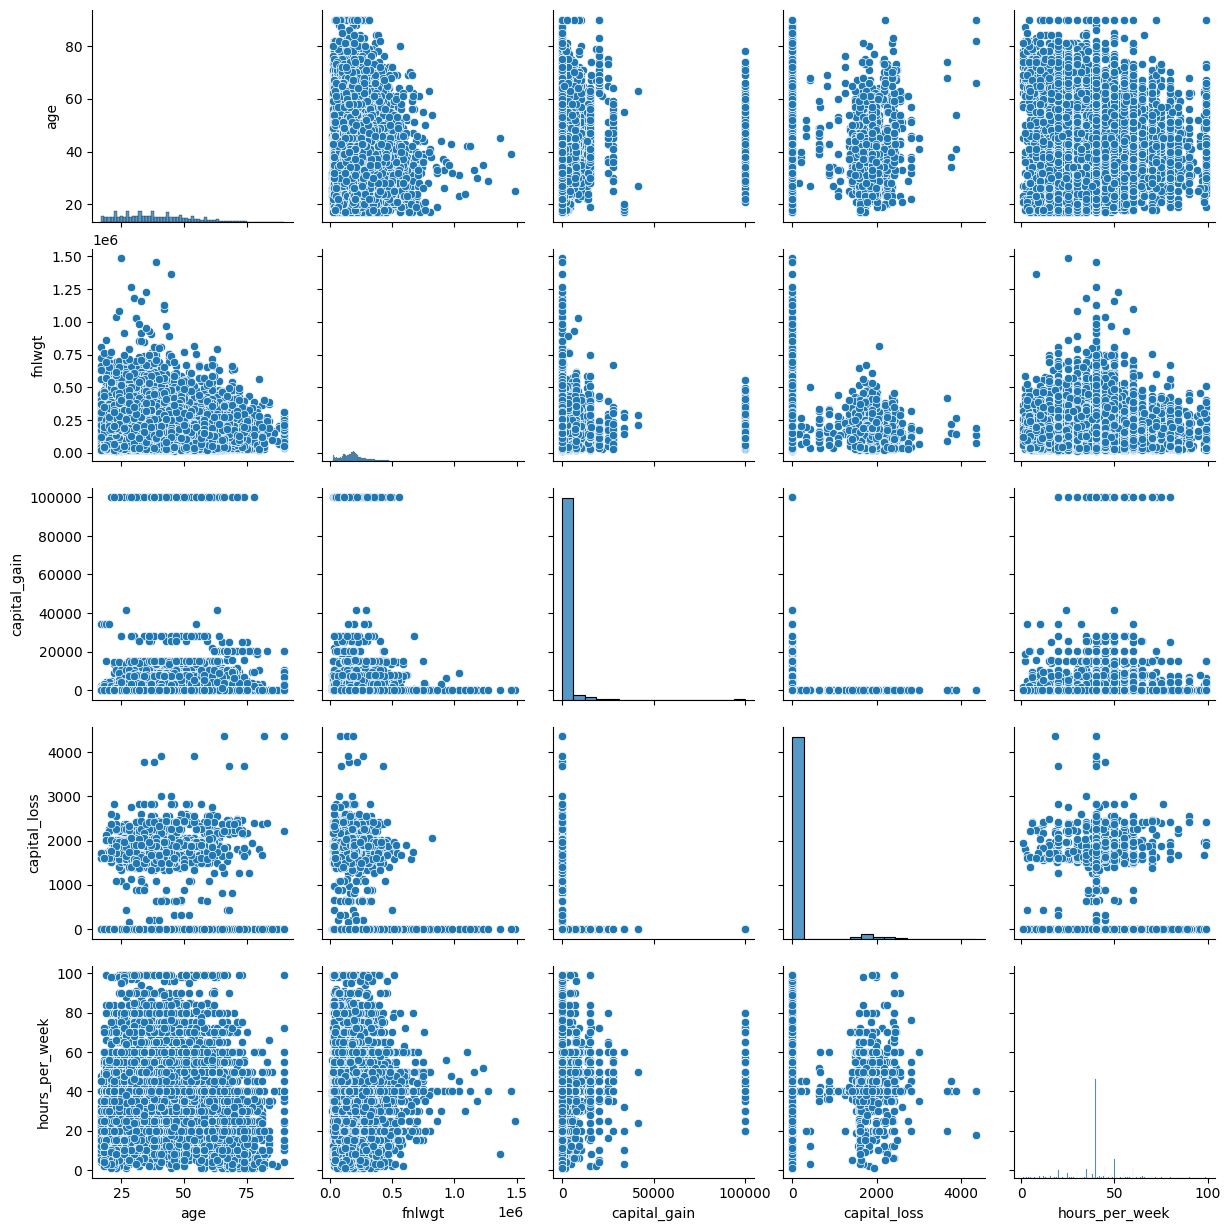

In [ ]:
sns.pairplot(df[number_cols])

#### let's verify with log

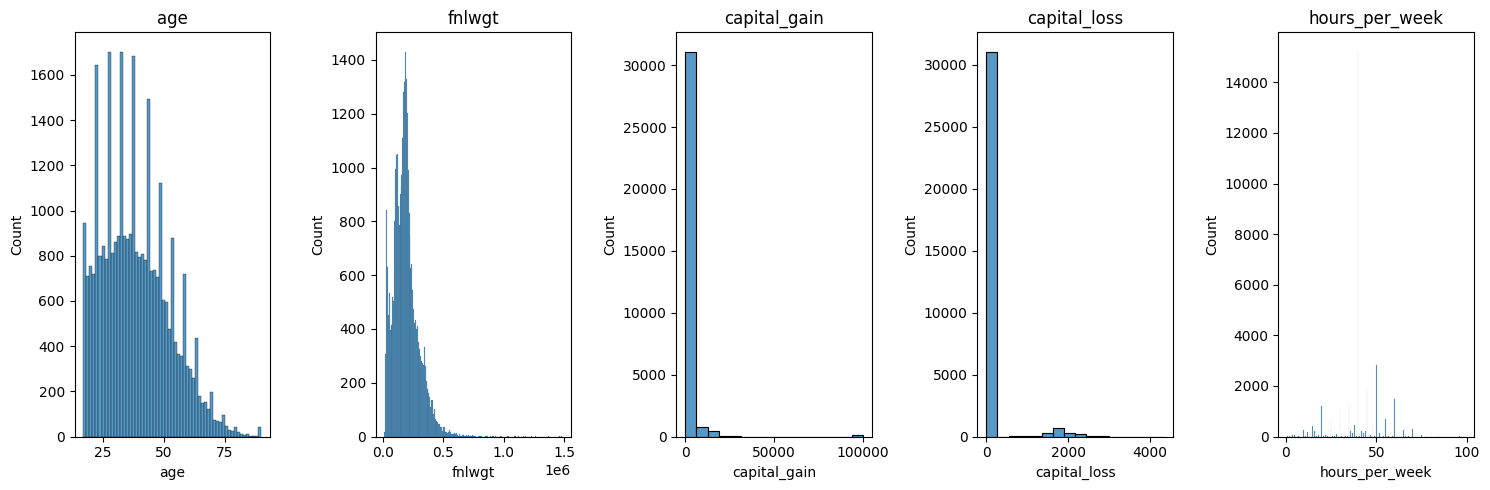

In [ ]:
log_df = np.log(df[number_cols]+1)
_,ax = plt.subplots(1,len(number_cols),figsize=(15,5))
for idx ,colname in enumerate(number_cols):
    sns.histplot(df[colname],ax=ax[idx])
    ax[idx].set_title(colname)
plt.tight_layout()
plt.show()

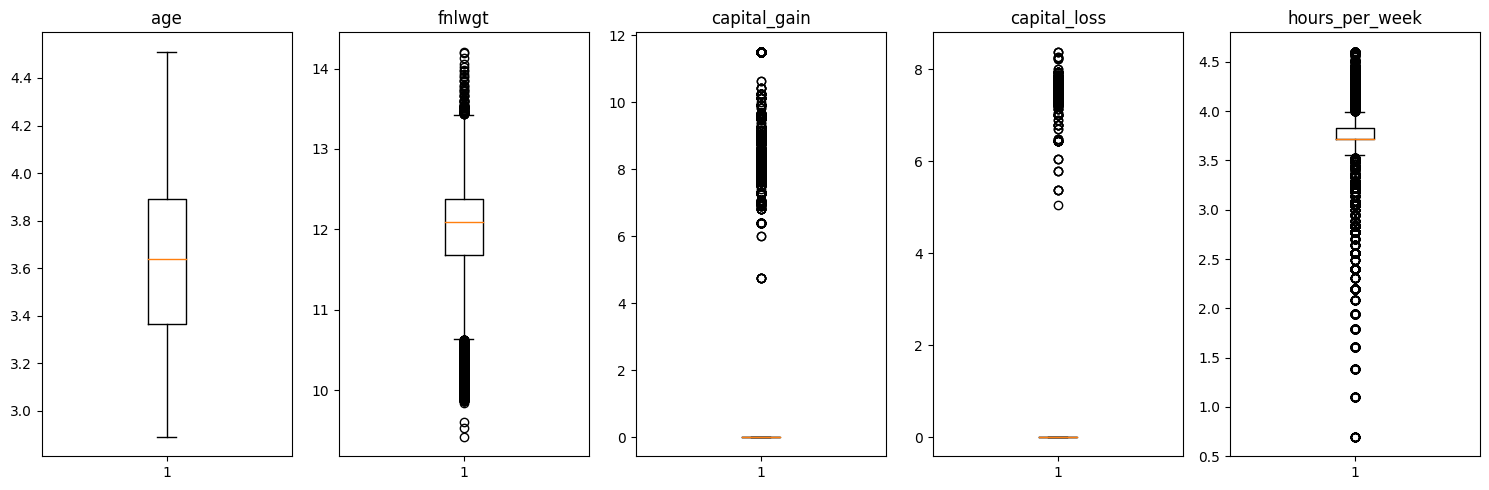

In [ ]:
log_df = np.log(df[number_cols]+1)
_,ax = plt.subplots(1,len(number_cols),figsize=(15,5))
for idx ,colname in enumerate(number_cols):
    ax[idx].boxplot(log_df[colname])
    ax[idx].set_title(colname)
plt.tight_layout()
plt.show()

#### let's create a column for log age and log_fnlwgt and drop the real values

In [ ]:
df['log_age'] = df.age.apply(lambda x : np.log(x))

In [ ]:
df['log_fnlwgt'] =  df.fnlwgt.apply(lambda x : np.log(x))

In [ ]:
df.drop(columns=['age','fnlwgt'],inplace=True)

<AxesSubplot: >

<Figure size 1500x500 with 0 Axes>

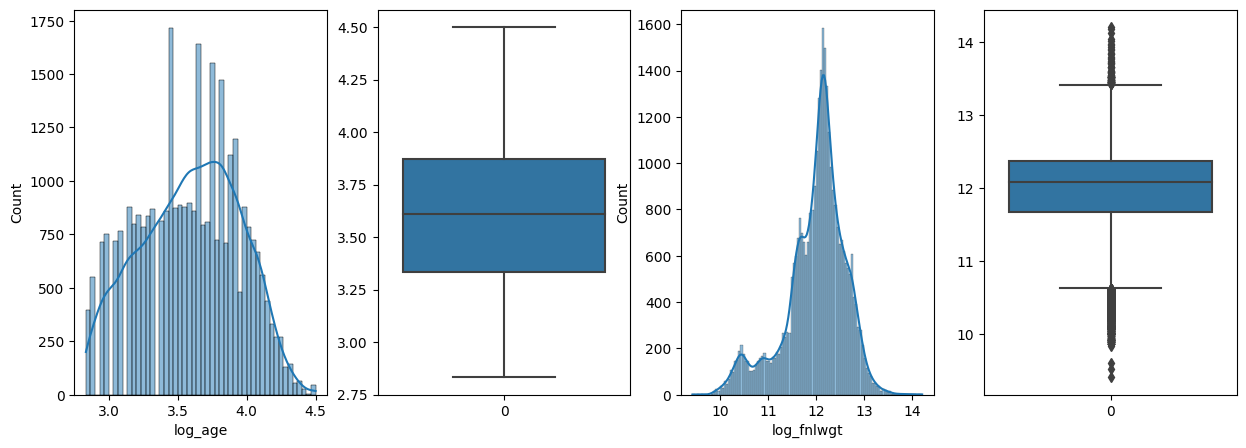

In [ ]:
plt.figure(figsize=(15,5))
_,ax = plt.subplots(1,4,figsize=(15,5))

sns.histplot(df.log_age,kde=True,ax=ax[0])
sns.boxplot(df.log_age,ax=ax[1])
sns.histplot(df.log_fnlwgt,kde=True,ax=ax[2])
sns.boxplot(df.log_fnlwgt,ax=ax[3])

#### let's check the relationship between capital gain and loss

In [ ]:
number_cols = ['log_age', 'log_fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [ ]:
df['log_capital_gain'] = df.capital_gain.apply(lambda x : np.log(x+1))

In [ ]:
df['log_capital_loss'] = df.capital_loss.apply(lambda x : np.log(x+1))
df['log_hours_per_week'] = df.hours_per_week.apply(lambda x : np.log(x+1))

In [ ]:
df.drop(columns=['capital_gain', 'capital_loss', 'hours_per_week'],inplace=True)

<AxesSubplot: xlabel='log_capital_gain', ylabel='log_hours_per_week'>

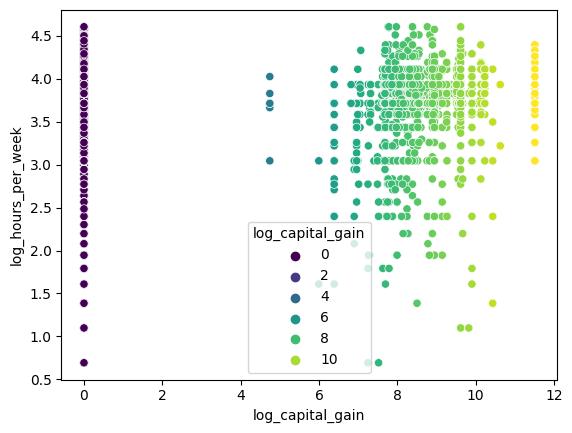

In [ ]:
sns.scatterplot(data=df,x='log_capital_gain',y='log_hours_per_week',hue='log_capital_gain',palette='viridis')

<AxesSubplot: xlabel='log_capital_loss', ylabel='log_hours_per_week'>

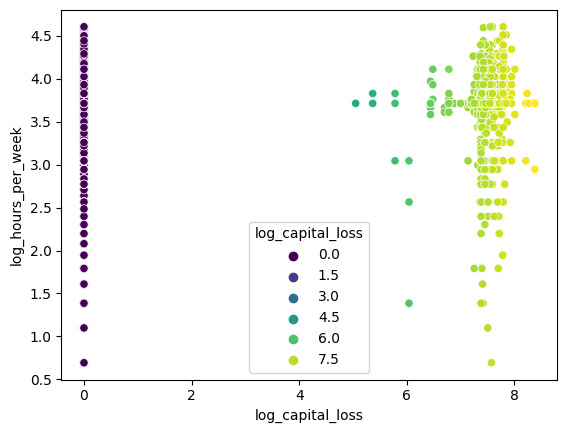

In [ ]:
sns.scatterplot(data=df,x='log_capital_loss',y='log_hours_per_week',hue='log_capital_loss',palette='viridis')

In [ ]:
number_cols = ['log_age', 'log_fnlwgt','log_capital_gain', 'log_capital_loss', 'log_hours_per_week']

<AxesSubplot: >

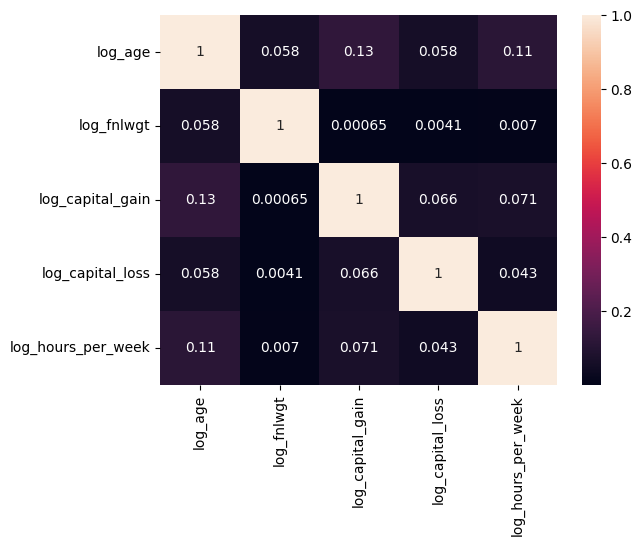

In [ ]:
sns.heatmap(df[number_cols].corr().abs(),annot=True)

In [ ]:
df.shape

(32561, 49)

In [ ]:
df['is_overtime'] = (df['log_hours_per_week'] > np.log(60)).astype(int)

In [ ]:
df.is_overtime.value_counts()

0    29976
1     2585
Name: is_overtime, dtype: int64

In [ ]:
df.shape

(32561, 50)

#### dimensionality reducation

###### backward , forward and decision tree feacture elemination

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DC

In [ ]:
dc = DC(max_depth=20,max_features=10,random_state=56,max_leaf_nodes=5)

In [ ]:
x= df.drop(columns=['salary'])
y = df['salary']

In [ ]:
dc.fit(x,y)

DecisionTreeClassifier(max_depth=20, max_features=10, max_leaf_nodes=5,
                       random_state=56)

In [ ]:
from sklearn import tree

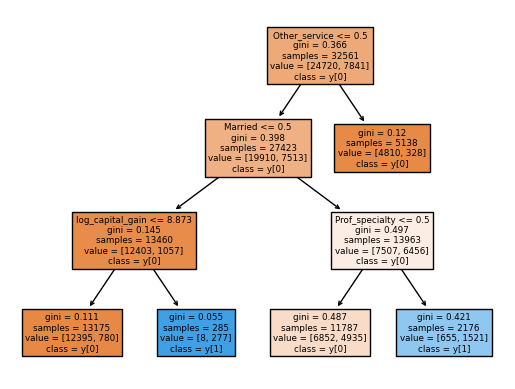

In [ ]:
_ = tree.plot_tree(dc,filled=True,class_names=True,feature_names=x.columns)

In [ ]:
sfs = SequentialFeatureSelector(estimator=dc,direction='backward',cv=5,n_jobs=-1,n_features_to_select=10)

In [ ]:
sfs.fit(x,y)

SequentialFeatureSelector(direction='backward',
                          estimator=DecisionTreeClassifier(max_depth=20,
                                                           max_features=10,
                                                           max_leaf_nodes=5,
                                                           random_state=56),
                          n_features_to_select=10, n_jobs=-1)

In [ ]:
selected_feature_names_backward = [feature_name for feature_name, selected in zip(x.columns, sfs.get_support()) if selected]
selected_feature_names_backward

['Adm_clerical',
 'Armed_Forces',
 'Craft_repair',
 'Farming_fishing',
 'Machine_op_inspct',
 'Other_service',
 'Transport_moving',
 'Widowed',
 'Married',
 'education']

#### forward

In [ ]:
sfs = SequentialFeatureSelector(estimator=dc,direction='forward',cv=5,n_jobs=-1,n_features_to_select=10)

In [ ]:
sfs.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(max_depth=20,
                                                           max_features=10,
                                                           max_leaf_nodes=5,
                                                           random_state=56),
                          n_features_to_select=10, n_jobs=-1)

In [ ]:
selected_feature_names = [feature_name for feature_name, selected in zip(x.columns, sfs.get_support()) if selected]
selected_feature_names

['Mexico',
 'United_States',
 'others',
 'Female',
 'Male',
 'Asian_Pac_Islander',
 'Married',
 'education',
 'log_capital_gain',
 'log_capital_loss']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salary_cleaned.csv');
df.head()

,Unnamed: 0,Mexico,United_States,others,Female,Male,Asian_Pac_Islander,Black,Other,White,...,State_gov,Without_pay,education,salary,log_age,log_fnlwgt,log_capital_gain,log_capital_loss,log_hours_per_week,is_overtime
0,0,0,1,0,0,1,0,0,0,1,...,1,0,13,0,3.663562,11.258240,7.684784,0.0,3.713572,0
1,1,0,1,0,0,1,0,0,0,1,...,0,0,13,0,3.912023,11.330336,0.000000,0.0,2.639057,0
2,2,0,1,0,0,1,0,0,0,1,...,0,0,9,0,3.637586,12.281393,0.000000,0.0,3.713572,0
3,3,0,1,0,0,1,0,1,0,0,...,0,0,7,0,3.970292,12.366153,0.000000,0.0,3.713572,0
4,4,0,0,1,1,0,0,1,0,0,...,0,0,13,0,3.332205,12.732011,0.000000,0.0,3.713572,0


In [160]:
df.drop(columns=['Unnamed: 0'],inplace= True)

In [161]:
df.shape

(32561, 50)

In [162]:
import seaborn as sns

In [163]:
df.dtypes

Mexico                  int64
United_States           int64
others                  int64
Female                  int64
Male                    int64
Asian_Pac_Islander      int64
Black                   int64
Other                   int64
White                   int64
Husband                 int64
Not_in_family           int64
Other_relative          int64
Own_child               int64
Unmarried               int64
Wife                    int64
Adm_clerical            int64
Armed_Forces            int64
Craft_repair            int64
Exec_managerial         int64
Farming_fishing         int64
Handlers_cleaners       int64
Machine_op_inspct       int64
Other_service           int64
Priv_house_serv         int64
Prof_specialty          int64
Protective_serv         int64
Sales                   int64
Tech_support            int64
Transport_moving        int64
Divorced                int64
Never_married           int64
Separated               int64
Widowed                 int64
Married   

In [164]:
from sklearn.linear_model import LogisticRegression as LR

## Logistic Regresstion

In [165]:
lr = LR()

In [166]:
x = df.drop(columns=['salary'])
y = df['salary']

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
x_train , x_test , y_train,y_test = train_test_split(x,y,shuffle=True,stratify=y,random_state=56)

In [169]:
lr.fit(X=x_train,y = y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
pred_ = lr.predict(x_test)

In [171]:
from sklearn.metrics import accuracy_score,f1_score

In [172]:
print(accuracy_score(pred_,y_test))
lr_  = accuracy_score(pred_,y_test)

0.8474388895713058


####  there is a preety desecnt accuracy with logistic model , let's try out some other models to get a accuracy

In [173]:
from sklearn.neighbors import KNeighborsClassifier as KC

In [174]:
kc = KC(n_neighbors=4,n_jobs=-1)

In [175]:
kc.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4)

In [176]:
kc_pred_ = kc.predict(x_test)

In [177]:
print(accuracy_score(kc_pred_,y_test))
kn_ = accuracy_score(kc_pred_,y_test)

0.8331900257953568


In [ ]:
n_values = range(1,100)
prdication_accuracy = []
for n_val in n_values:
  kc = KC(n_neighbors=n_val,n_jobs=-1)
  kc.fit(x_train,y_train)
  pred_kc_ = kc.predict(x_test)
  temp_ = accuracy_score(pred_kc_,y_test)
  prdication_accuracy.append(temp_)


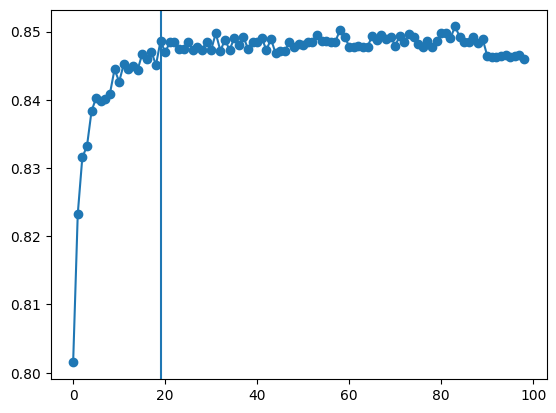

In [ ]:
plt.plot(prdication_accuracy,marker= 'o')
plt.axvline(19)

#### as we can see the accuracy is getting almost const after 19, so we can choose 19 as our final n value

In [178]:
kc = KC(n_neighbors=19,n_jobs=-1)

In [179]:
kc.fit(x_train,y_train)
pred_kc_ = kc.predict(x_test)
print(f"accuracy for n:19 is {accuracy_score(pred_kc_,y_test)}")
kn_ = accuracy_score(pred_kc_,y_test)

accuracy for n:19 is 0.8451050239528314


#### The score for both KNN and logistic model is almost similar let's try with tree method , if we could get some good accuracy .


In [180]:
from sklearn.tree import DecisionTreeClassifier as DC

In [181]:
dc = DC(max_depth=10,max_features=20,max_leaf_nodes=10)

In [182]:
dc.fit(x_train,y_train)
pred_dc = dc.predict(x_test)
print(f"acccuracy with decision tree is {accuracy_score(pred_dc,y_test)}")

acccuracy with decision tree is 0.8459648691806904


In [183]:
from sklearn import tree

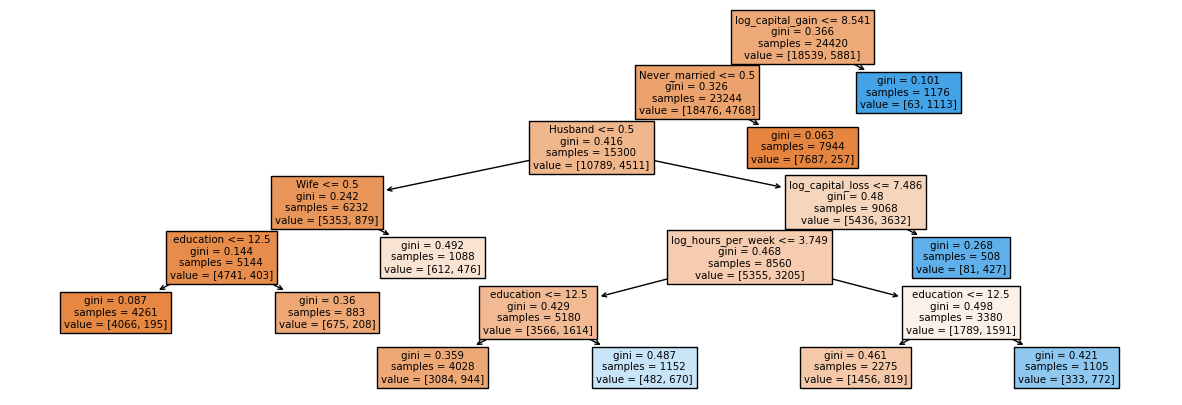

In [184]:
plt.figure(figsize=(15,5))
_ = tree.plot_tree(dc,feature_names=x_test.columns,filled=True)

##### let's find the best parameter for decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,40,10),
    'min_samples_split': range(0,40,10),
    'min_samples_leaf': [1, 2, 4,6],
}
dc = DC()

In [ ]:
gs = GridSearchCV(estimator=dc,param_grid=param_grid,n_jobs=-1,scoring='accuracy')

In [ ]:
gs.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 40, 10),
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': range(0, 40, 10)},
             scoring='accuracy')

In [ ]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 30}

#### let's bulid the tree again with the selected params and check the accuracy

In [185]:
dc = DC(criterion= 'entropy',max_depth= 11,min_samples_leaf= 4,min_samples_split= 30)

In [186]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                       min_samples_split=30)

In [187]:
pred_dc_ = dc.predict(x_test)

In [188]:
print(accuracy_score(pred_dc_,y_test))
dc_ = accuracy_score(pred_dc_,y_test)

0.8522294558408058


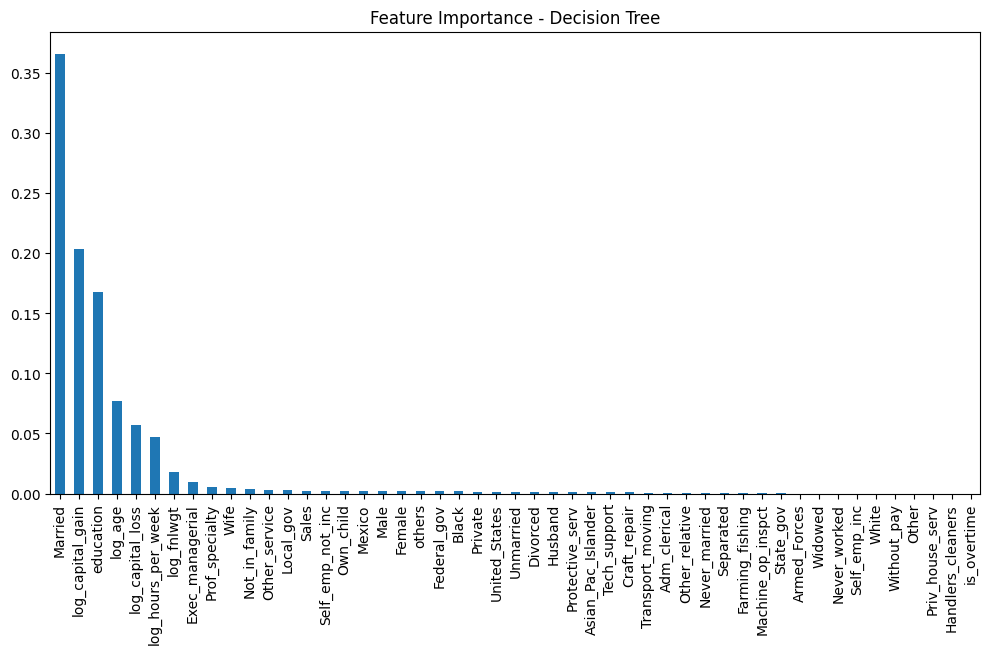

In [189]:
feature_importance = pd.Series(dc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance - Decision Tree')
plt.show()


### the accuracy goes up

In [190]:
#### random foresst

from sklearn.ensemble import RandomForestClassifier as RC

rc = RC(max_depth=10,max_leaf_nodes=6,bootstrap=True,n_jobs=-1)

rc.fit(x_train,y_train)

pred_rc_ = rc.predict(x_test)

accuracy_score(pred_rc_,y_test)



0.8342955410883184

### let's apply grid search on random forest as well

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [ 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

rc = RC()

rs_random_forest = RandomizedSearchCV(estimator=rc,param_distributions=param_dist,n_jobs=-1)

In [ ]:
rs_random_forest.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200, 300]})

In [ ]:
rs_random_forest.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'criterion': 'gini'}

In [192]:
rc = RC(n_estimators= 50,min_samples_split= 5,min_samples_leaf= 2,max_depth= 20,criterion= 'gini')

In [193]:
rc.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50)

In [194]:
pred_rc = rc.predict(x_test)

In [196]:
print(accuracy_score(pred_rc,y_test))
rf_ = accuracy_score(pred_rc,y_test)

0.8688121852352291


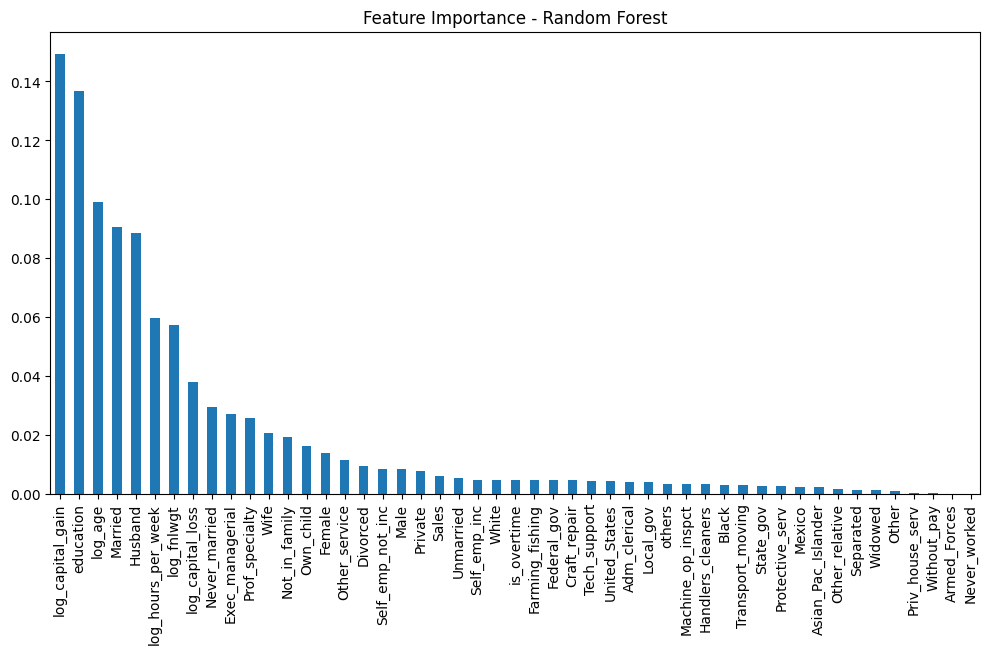

In [197]:
feature_importance = pd.Series(rc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance - Random Forest')
plt.show()


In [198]:
### SVM

from sklearn.svm import SVC

sv = SVC(verbose=True)

sv.get_params()

sv.fit(x_train,y_train)

pred_sv = sv.predict(x_test)

print(accuracy_score(pred_sv,y_test))
svm_ = accuracy_score(pred_sv,y_test)

[LibSVM]0.8528436310035622


In [199]:
#### xg boost

from xgboost import XGBClassifier as XC

xc = XC()

xc.fit(x_train,y_train)

pred_xc = xc.predict(x_test)

print(accuracy_score(pred_xc,y_test))
xg_ = accuracy_score(pred_xc,y_test)

0.8711460508537034


Text(0.5, 1.0, 'SVM')

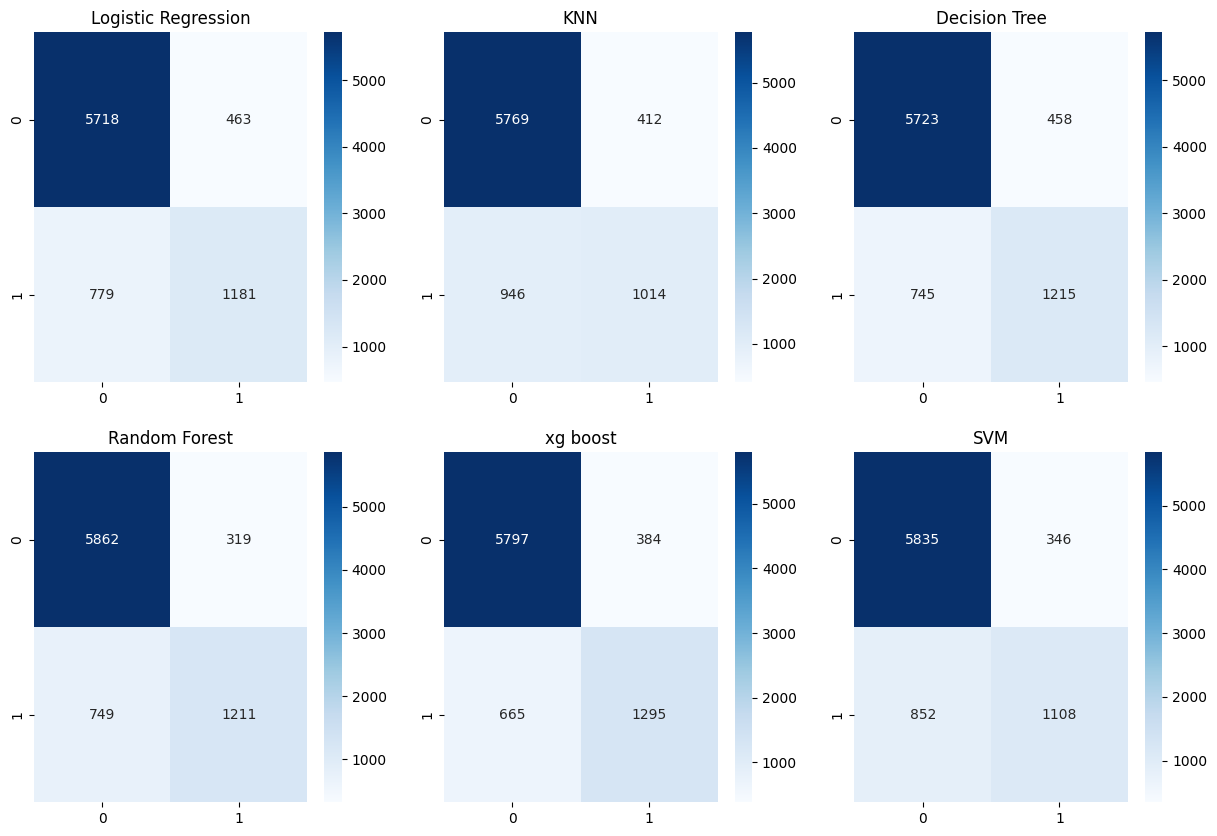

In [200]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, pred_)
cm_kc = confusion_matrix(y_test, kc_pred_)

cm_dc = confusion_matrix(y_test, pred_dc_)
cm_rf= confusion_matrix(y_test, pred_rc)
cm_xc= confusion_matrix(y_test, pred_xc)
cm_sv = confusion_matrix(y_test, pred_sv)

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
sns.heatmap(cm_kc, annot=True, fmt="d", cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_title('KNN')
sns.heatmap(cm_dc,annot=True,fmt="d", cmap="Blues", ax=axes[0, 2])
axes[0, 2].set_title('Decision Tree')


sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')
sns.heatmap(cm_xc, annot=True, fmt="d", cmap="Blues", ax=axes[1, 1])
axes[1, 1].set_title('xg boost')
sns.heatmap(cm_sv,annot=True,fmt="d", cmap="Blues", ax=axes[1, 2])
axes[1, 2].set_title('SVM')

In [201]:
model_accuracy = pd.DataFrame({"model_name":['logistic','decision_tree','random_forest','knn','svm','xgboost'],"accuracy":[lr_,dc_,rf_,kn_,svm_,xg_]})

In [202]:
model_accuracy = model_accuracy.sort_values(by=['accuracy'],ascending=False)

In [204]:
model_accuracy.head(6)

,model_name,accuracy
5,xgboost,0.871146
2,random_forest,0.868812
4,svm,0.852844
1,decision_tree,0.852229
0,logistic,0.847439
3,knn,0.845105


### let's use some ensemble techs

In [205]:
models= [xc,rc,sv,dc,lr,kc]
models_names= ['xgboost','randomForest','SVM','DecisionYTree','logistic','knn']

In [206]:
trainingSet = (x_train,y_train)
validationSet = (x_test,y_test)

In [207]:
def model_preapartion(models,models_names,train_set,validationset):
  traing_model_df = pd.DataFrame({})
  test_model_df = pd.DataFrame({})

  for model,model_name in zip(models,models_names):

    _ = pd.DataFrame({model_name:model.predict(train_set[0])})
    traing_model_df = pd.concat([traing_model_df,_],axis=1)

    _ = pd.DataFrame({model_name:model.predict(validationset[0])})
    test_model_df = pd.concat([test_model_df,_],axis=1)

  return traing_model_df,test_model_df



In [208]:
training_predications , test_predications = model_preapartion(models,models_names,trainingSet,validationSet)

In [209]:
training_predications.shape,test_predications.shape

((24420, 6), (8141, 6))

In [210]:
training_predications.head()

,xgboost,randomForest,SVM,DecisionYTree,logistic,knn
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [211]:
test_predications.head()

,xgboost,randomForest,SVM,DecisionYTree,logistic,knn
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,1


### stacking

In [212]:
from sklearn.naive_bayes import BernoulliNB

In [213]:
bn_stacking = BernoulliNB()
bn_stacking.fit(training_predications,y_train)

BernoulliNB()

In [214]:
pred_bn_stacking = bn_stacking.predict(test_predications)

In [215]:
accuracy_score(pred_bn_stacking,y_test)

0.8641444539982803

In [216]:
dc_stacking = DC()
dc_stacking.fit(training_predications,y_train)

DecisionTreeClassifier()

In [217]:
pred_dc_stacking = dc_stacking.predict(test_predications)

In [218]:
accuracy_score(pred_dc_stacking,y_test)

0.8707775457560496

#### there is not much more of imporovment in the model,
#### let's try ranking avg

In [219]:
model_accuracy = model_accuracy.sort_values(by=['accuracy'])

In [221]:
model_accuracy['rank']= [i for i in range(1,7)]

In [222]:
model_accuracy.head(6)

,model_name,accuracy,rank
3,knn,0.845105,1
0,logistic,0.847439,2
1,decision_tree,0.852229,3
4,svm,0.852844,4
2,random_forest,0.868812,5
5,xgboost,0.871146,6


In [223]:
model_accuracy['weights'] = model_accuracy['rank']/sum(model_accuracy['rank'])

In [230]:
model_accuracy = model_accuracy.sort_values(by=['rank'],ascending=False)

In [231]:
model_accuracy

,model_name,accuracy,rank,weights
5,xgboost,0.871146,6,0.285714
2,random_forest,0.868812,5,0.238095
4,svm,0.852844,4,0.190476
1,decision_tree,0.852229,3,0.142857
0,logistic,0.847439,2,0.095238
3,knn,0.845105,1,0.047619


In [238]:
weights = model_accuracy['weights'].values

In [225]:
test_predications.head()

,xgboost,randomForest,SVM,DecisionYTree,logistic,knn
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,1


In [248]:
test_predications['ranked_value'] = test_predications.apply(lambda x: np.sum(
    [
        x['xgboost'] * weights[0],
        x['randomForest'] * weights[1],
        x['SVM'] * weights[2],
        x['DecisionYTree'] * weights[3],
        x['logistic'] * weights[4],
        x['knn'] * weights[5]
    ]
), axis=1)


In [254]:
threshold = 0.4
final_predictions = (test_predications['ranked_value']  > threshold).astype(int)

In [256]:
threshold = [i/10 for i in range(0,10)]

In [258]:
scores = []
for t in threshold:
  final_predictions = (test_predications['ranked_value']  > t).astype(int)
  scores.append(accuracy_score(final_predictions,y_test))

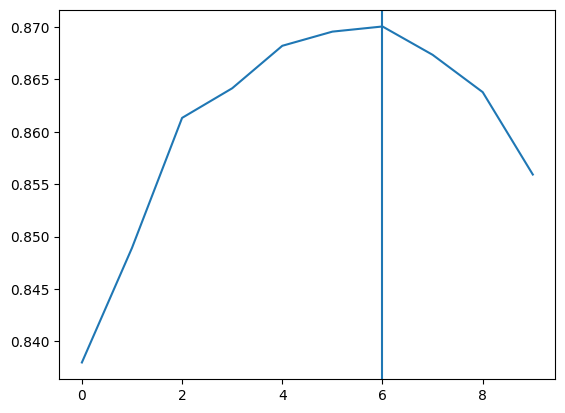

In [262]:
plt.plot(scores)
plt.axvline(6)

In [263]:
threshold = 0.6
final_predictions = (test_predications['ranked_value']  > threshold).astype(int)

In [264]:
accuracy_score(final_predictions,y_test)

0.8700405355607419